https://www.youtube.com/watch?v=8jazNUpO3lQ

y = mx+c [where we want to predict 'x']

Objective: We are predicting home prices using linear regression. We use training data that has home areas in square feet and corresponding prices and train a linear regression model using sklearn linear regression class. Later on predict method is used on linear regression object to make actual forecast. 

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
os.chdir("/Users/yudiudyan/Desktop/iNeuron/Code Basics - Entire GitHub Clone/ML/1_linear_reg/")
os.getcwd()

'/Users/yudiudyan/Desktop/iNeuron/Code Basics - Entire GitHub Clone/ML/1_linear_reg'

In [3]:
df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [5]:
x = df[['area']]
y = df.price
y

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

Plotting a scatterplot to get an idea about the distribution of the datapoints:

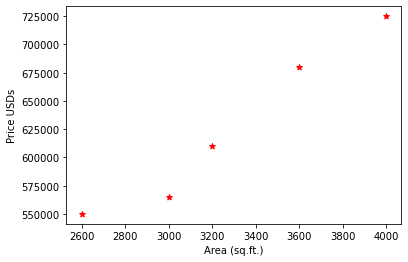

In [8]:
%matplotlib inline
plt.xlabel("Area (sq.ft.)")
plt.ylabel("Price USDs")
plt.scatter(df.area,df.price,color="red",marker = "*")

In [9]:
# building the linear regression model:
reg = LinearRegression()
reg.fit(x,y)
reg.coef_
reg.intercept_

180616.43835616432

In [10]:
reg.score(x,y)

0.9584301138199486

The score for the model is 95.84%.

In [11]:
# Predicting the price for a 3300 sqft. house:
reg.predict([[3300]])

array([628715.75342466])

In [12]:
# Predicting the price for a 5000 sqft. house:
reg.predict([[5000]])

array([859554.79452055])

In [13]:
f = reg.predict(df[['area']])
f

array([533664.38356164, 587979.45205479, 615136.98630137, 669452.05479452,
       723767.12328767])

In [14]:
df['Model Price Prediction'] = f
df.to_csv("Homeprices & Model Prediction.csv")

In [15]:
# Reading the 'areas' file to read areas to predict the prices:
d = pd.read_csv('areas.csv')
p = reg.predict(d)
d['Predicted Prices'] = p # adding a new columns with the predicted prices.
d

,area,Predicted Prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [16]:
d.to_csv("House Price Prediction.csv",index = False)

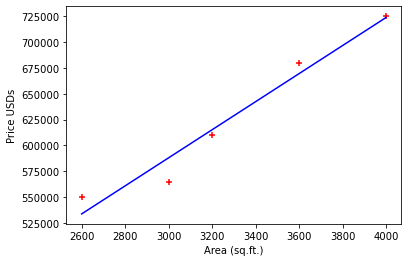

In [17]:
%matplotlib inline
plt.xlabel("Area (sq.ft.)")
plt.ylabel("Price USDs")
plt.scatter(df.area,df.price,color="red",marker = "+")
plt.plot(df.area,reg.predict(df[['area']]),color="blue")
plt.savefig("Area vs. Price Prediction.png")
# shows the linear reg line as blue after prediction of prices. 